# Correlation bars of the 3 models WMT budget terms

In [2]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import numpy as np
import json
from scipy.stats import pearsonr

In [3]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [4]:
e = pd.read_csv('/home/jovyan/WMT-project/ECCO-budgets/ecco_budgt_ind', index_col='time')
ss = pd.read_csv('/home/jovyan/WMT-project/SOSE-budgets/sose_budgt_ind', index_col='time')
sd = pd.read_csv('/home/jovyan/WMT-project/SODA/soda_budgt_ind', index_col='time')

In [5]:
e

,dvdt,psi,omega*,ecco,enso,fw_flx,heat_flx,sam,windstress_curl
time,,,,,,,,,
1992-01-15,NaN,NaN,NaN,-1.170194,1.883747,-1.300427,0.001594,-0.122525,-0.219413
1992-02-13,NaN,NaN,NaN,-0.488146,1.786449,-0.869125,-0.867469,-0.885817,1.102549
1992-03-15,NaN,NaN,NaN,0.556974,1.614739,-2.230632,-1.918516,-0.616002,-0.435378
1992-04-14,NaN,NaN,NaN,1.153485,1.408937,-0.181473,0.300216,0.213964,0.524290
1992-05-15,NaN,NaN,NaN,0.758463,1.166296,-0.546701,0.713055,-1.179878,1.575049
...,...,...,...,...,...,...,...,...,...
2015-08-15,1.490057,0.885958,-0.119296,0.559372,2.045500,0.225318,-0.579957,1.083196,-1.076998
2015-09-14,2.737592,1.610785,0.321022,0.380170,2.336527,-0.677235,-0.413434,1.039752,-0.643988
2015-10-15,2.211281,1.473193,0.155614,0.957576,2.599419,0.302553,-0.738937,-0.384399,1.538923


In [6]:
#dropping nans so `pearsonr()` can compute corr coeff and p value
e_pearson = e.dropna()
e_pearson

,dvdt,psi,omega*,ecco,enso,fw_flx,heat_flx,sam,windstress_curl
time,,,,,,,,,
1993-01-15,-0.448309,-1.303916,1.164790,-0.706084,0.265627,-1.359034,0.026328,-1.439562,1.308166
1993-02-12,0.003738,-1.086478,1.361348,-0.156529,0.450160,-1.244748,-0.610537,0.611327,0.723249
1993-03-15,0.032268,-1.049076,1.480390,0.003250,0.635021,-0.212272,0.245073,-0.053166,0.616843
1993-04-14,-0.259053,-1.245866,1.477891,-0.224828,0.793878,-0.894995,0.560897,0.928766,1.092720
1993-05-15,-0.115399,-0.883633,1.401532,-0.485070,0.804948,0.584948,0.253214,1.234689,-0.725718
...,...,...,...,...,...,...,...,...,...
2015-07-15,1.059382,0.649424,-0.062573,1.022607,1.725431,1.089095,-0.743640,1.080559,-2.534667
2015-08-15,1.490057,0.885958,-0.119296,0.559372,2.045500,0.225318,-0.579957,1.083196,-1.076998
2015-09-14,2.737592,1.610785,0.321022,0.380170,2.336527,-0.677235,-0.413434,1.039752,-0.643988


In [7]:
ecco = e.corr()
sose = ss.corr()
soda = sd.corr()

In [8]:
#pd.corr() pearson coeff without confidence p value
ecco.iloc[0,1]

0.6553273341461735

In [9]:
dvdt_e = e_pearson.iloc[:,0]
psi_e = e_pearson.iloc[:,1]

In [10]:
#pvalue
pearsonr(dvdt_e, psi_e)[1]

3.96838512201135e-35

In [11]:
conf_matrix = np.empty_like(ecco)

In [12]:
conf_matrix[0,0] = 1

In [13]:
conf_matrix

array([[1.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.7486041

In [14]:
e_pearson.iloc[:, 0]

time
1993-01-15   -0.448309
1993-02-12    0.003738
1993-03-15    0.032268
1993-04-14   -0.259053
1993-05-15   -0.115399
                ...   
2015-07-15    1.059382
2015-08-15    1.490057
2015-09-14    2.737592
2015-10-15    2.211281
2015-11-14    2.196468
Name: dvdt, Length: 275, dtype: float64

In [15]:
e_pearson.iloc[:, 1]

time
1993-01-15   -1.303916
1993-02-12   -1.086478
1993-03-15   -1.049076
1993-04-14   -1.245866
1993-05-15   -0.883633
                ...   
2015-07-15    0.649424
2015-08-15    0.885958
2015-09-14    1.610785
2015-10-15    1.473193
2015-11-14    1.436117
Name: psi, Length: 275, dtype: float64

In [16]:
import scipy

In [16]:
scipy.__version__

'1.9.0'

In [18]:
pearsonr(e_pearson.iloc[:, 0], e_pearson.iloc[:, 1]).statistic

0.6553273341461733

In [19]:
test = pearsonr(e_pearson.iloc[:, 0], e_pearson.iloc[:, 1])
test

PearsonRResult(statistic=0.6553273341461733, pvalue=3.96838512201135e-35)

In [20]:
test[1]

3.96838512201135e-35

In [29]:
test.confidence_interval()

ConfidenceInterval(low=0.5821701275787595, high=0.7179589126342191)

In [30]:
test.confidence_interval

<bound method PearsonRResult.confidence_interval of PearsonRResult(statistic=0.6553273341461733, pvalue=3.96838512201135e-35)>

In [34]:
test.confidence_interval(confidence_level=.95)

ConfidenceInterval(low=0.5821701275787595, high=0.7179589126342191)

In [23]:
def confidence_matrix(corr_arr, orig_df):
    """Function to create a matrix populated with Pearson's p-value.
       Input are the corr_arr: pandas df after running `.corr()` to 
       get output matrix the same shape corr matrices; and orig_df: to drop NaNs since 
       `pearsonr()` cannot run with NaNs in df."""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j])[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [37]:
def confidence_interval_low(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[0]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [40]:
def confidence_interval_high(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [24]:
ecco_conf = confidence_matrix(ecco, e)
sose_conf = confidence_matrix(sose, ss)
soda_conf = confidence_matrix(soda, sd)

In [38]:
ecco_conf_low = confidence_interval_low(ecco, e)
sose_conf_low = confidence_interval_low(sose, ss)
soda_conf_low = confidence_interval_low(soda, sd)

In [51]:
ecco_conf_high = confidence_interval_high(ecco, e)
sose_conf_high = confidence_interval_high(sose, ss)
soda_conf_high = confidence_interval_high(soda, sd)

## Below are the matrices for correlation, p value, low and high confidence interval boundaries

### ECCO

In [48]:
ecco

,dvdt,psi,omega*,ecco,enso,fw_flx,heat_flx,sam,windstress_curl
dvdt,1.000000,0.655327,0.551419,0.000755,-0.157868,0.051062,0.055594,0.075594,0.038536
psi,0.655327,1.000000,-0.190677,-0.113987,-0.125978,0.045498,0.066887,0.091525,-0.007549
omega*,0.551419,-0.190677,1.000000,0.200544,-0.075979,-0.030702,0.039172,-0.021122,0.108266
ecco,0.000755,-0.113987,0.200544,1.000000,0.040300,-0.211307,-0.165878,-0.045092,0.140075
enso,-0.157868,-0.125978,-0.075979,0.040300,1.000000,-0.064801,-0.068467,-0.142116,0.081242
fw_flx,0.051062,0.045498,-0.030702,-0.211307,-0.064801,1.000000,0.105556,0.159329,-0.277577
heat_flx,0.055594,0.066887,0.039172,-0.165878,-0.068467,0.105556,1.000000,-0.054843,0.126801
sam,0.075594,0.091525,-0.021122,-0.045092,-0.142116,0.159329,-0.054843,1.000000,-0.613416
windstress_curl,0.038536,-0.007549,0.108266,0.140075,0.081242,-0.277577,0.126801,-0.613416,1.000000


In [28]:
ecco_conf

,dvdt,psi,omega*,ecco,enso,fw_flx,heat_flx,sam,windstress_curl
dvdt,0.000000e+00,3.968385e-35,2.813636e-23,0.990062,0.008729,3.989691e-01,0.358389,2.114243e-01,5.245310e-01
psi,3.968385e-35,0.000000e+00,1.489025e-03,0.059051,0.036806,4.523848e-01,0.268994,1.300159e-01,9.008207e-01
omega*,2.813636e-23,1.489025e-03,0.000000e+00,0.000824,0.209102,6.122043e-01,0.517708,7.273029e-01,7.305579e-02
ecco,9.900619e-01,5.905139e-02,8.241999e-04,0.000000,0.261250,5.104191e-03,0.033462,6.787013e-01,1.359779e-02
enso,8.729195e-03,3.680575e-02,2.091021e-01,0.261250,0.000000,4.863179e-01,0.042461,4.641624e-02,2.810927e-01
fw_flx,3.989691e-01,4.523848e-01,6.122043e-01,0.005104,0.486318,0.000000e+00,0.243443,4.011461e-02,8.582125e-07
heat_flx,3.583888e-01,2.689936e-01,5.177084e-01,0.033462,0.042461,2.434426e-01,0.000000,2.691806e-01,3.319146e-02
sam,2.114243e-01,1.300159e-01,7.273029e-01,0.678701,0.046416,4.011461e-02,0.269181,0.000000e+00,1.464955e-29
windstress_curl,5.245310e-01,9.008207e-01,7.305579e-02,0.013598,0.281093,8.582125e-07,0.033191,1.464955e-29,0.000000e+00


In [42]:
ecco_conf_low

,dvdt,psi,omega*,ecco,enso,fw_flx,heat_flx,sam,windstress_curl
dvdt,1.000000,0.582170,0.463357,-0.117540,-0.271090,-0.067630,-0.063105,-0.043075,-0.080113
psi,0.582170,1.000000,-0.302146,-0.229181,-0.240675,-0.073180,-0.051807,-0.027052,-0.125721
omega*,0.463357,-0.302146,1.000000,0.084259,-0.192532,-0.148447,-0.079480,-0.139059,-0.010148
ecco,-0.117540,-0.229181,0.084259,1.000000,-0.050714,-0.281112,-0.242885,-0.142949,0.030918
enso,-0.271090,-0.240675,-0.192532,-0.050714,1.000000,-0.159642,-0.237296,-0.235149,-0.053471
fw_flx,-0.067630,-0.073180,-0.148447,-0.281112,-0.159642,1.000000,-0.048114,0.005661,-0.396253
heat_flx,-0.063105,-0.051807,-0.079480,-0.242885,-0.237296,-0.048114,1.000000,-0.183692,0.010355
sam,-0.043075,-0.027052,-0.139059,-0.142949,-0.235149,0.005661,-0.183692,1.000000,-0.680319
windstress_curl,-0.080113,-0.125721,-0.010148,0.030918,-0.053471,-0.396253,0.010355,-0.680319,1.000000


In [52]:
ecco_conf_high

,dvdt,psi,omega*,ecco,enso,fw_flx,heat_flx,sam,windstress_curl
dvdt,1.000000,0.717959,0.628697,0.119028,-0.040337,0.168329,0.172742,0.192159,0.156109
psi,0.717959,1.000000,-0.074063,0.004356,-0.007810,0.162905,0.183718,0.207562,0.110833
omega*,0.628697,-0.074063,1.000000,0.311440,0.042689,0.087902,0.156730,0.097405,0.223685
ecco,0.119028,0.004356,0.311440,1.000000,0.184776,-0.051164,-0.010156,0.093472,0.262329
enso,-0.040337,-0.007810,0.042689,0.184776,1.000000,0.076511,-0.004226,-0.001953,0.182105
fw_flx,0.168329,0.162905,0.087902,-0.051164,0.076511,1.000000,0.187292,0.238649,-0.179548
heat_flx,0.172742,0.183718,0.156730,-0.010156,-0.004226,0.187292,1.000000,0.051833,0.243072
sam,0.192159,0.207562,0.097405,0.093472,-0.001953,0.238649,0.051833,1.000000,-0.531352
windstress_curl,0.156109,0.110833,0.223685,0.262329,0.182105,-0.179548,0.243072,-0.531352,1.000000


### SOSE

In [49]:
sose

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,1.000000,-0.721784,0.936791,-0.104923,-0.032755,-0.059553,-0.051311,-0.397497,0.059854
psi,-0.721784,1.000000,-0.912713,-0.080665,0.051883,0.087316,0.161069,0.669263,-0.333050
omega*,0.936791,-0.912713,1.000000,-0.056596,-0.039667,-0.080526,-0.101374,-0.557542,0.189614
enso,-0.104923,-0.080665,-0.056596,1.000000,-0.050652,0.080254,-0.283055,-0.037990,0.276552
fw_flx,-0.032755,0.051883,-0.039667,-0.050652,1.000000,-0.203783,-0.238027,0.053914,0.017578
heat_flx,-0.059553,0.087316,-0.080526,0.080254,-0.203783,1.000000,0.044157,0.052403,0.047809
sam,-0.051311,0.161069,-0.101374,-0.283055,-0.238027,0.044157,1.000000,-0.005067,-0.589282
sose,-0.397497,0.669263,-0.557542,-0.037990,0.053914,0.052403,-0.005067,1.000000,-0.117696
windstress_curl,0.059854,-0.333050,0.189614,0.276552,0.017578,0.047809,-0.589282,-0.117696,1.000000


In [29]:
sose_conf

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,0.000000e+00,7.655631e-11,3.924564e-28,0.424964,0.803790,0.651275,6.970156e-01,1.661389e-03,6.496276e-01
psi,7.655631e-11,0.000000e+00,3.250525e-24,0.540086,0.693807,0.507084,2.189093e-01,5.040206e-09,9.316331e-03
omega*,3.924564e-28,3.250525e-24,0.000000e+00,0.667549,0.763479,0.540785,4.408802e-01,3.700918e-06,1.467655e-01
enso,4.249636e-01,5.400863e-01,6.675494e-01,0.000000,0.700722,0.542157,2.841999e-02,7.732062e-01,3.243483e-02
fw_flx,8.037901e-01,6.938065e-01,7.634785e-01,0.700722,0.000000,0.118352,6.704334e-02,6.824466e-01,8.939524e-01
heat_flx,6.512747e-01,5.070840e-01,5.407852e-01,0.542157,0.118352,0.000000,7.376225e-01,6.908890e-01,7.167976e-01
sam,6.970156e-01,2.189093e-01,4.408802e-01,0.028420,0.067043,0.737622,0.000000e+00,9.693513e-01,7.293241e-07
sose,1.661389e-03,5.040206e-09,3.700918e-06,0.773206,0.682447,0.690889,9.693513e-01,0.000000e+00,3.704618e-01
windstress_curl,6.496276e-01,9.316331e-03,1.467655e-01,0.032435,0.893952,0.716798,7.293241e-07,3.704618e-01,0.000000e+00


In [44]:
sose_conf_low

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,1.000000,-0.824581,0.896001,-0.349535,-0.284315,-0.308808,-0.301310,-0.591699,-0.197066
psi,-0.824581,1.000000,-0.947130,-0.327874,-0.204739,-0.170387,-0.096816,0.500373,-0.541205
omega*,0.896001,-0.947130,1.000000,-0.306121,-0.290664,-0.327749,-0.346382,-0.710831,-0.067563
enso,-0.349535,-0.327874,-0.306121,1.000000,-0.300709,-0.177283,-0.500972,-0.289126,0.024336
fw_flx,-0.284315,-0.204739,-0.290664,-0.300709,1.000000,-0.435188,-0.463912,-0.202787,-0.237406
heat_flx,-0.308808,-0.170387,-0.327749,-0.177283,-0.435188,1.000000,-0.212147,-0.204239,-0.208649
sam,-0.301310,-0.096816,-0.346382,-0.500972,-0.463912,-0.212147,1.000000,-0.258659,-0.733457
sose,-0.591699,0.500373,-0.710831,-0.289126,-0.202787,-0.204239,-0.258659,1.000000,-0.360837
windstress_curl,-0.197066,-0.541205,-0.067563,0.024336,-0.237406,-0.208649,-0.733457,-0.360837,1.000000


In [53]:
sose_conf_high

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,1.000000,-0.572851,0.961903,0.153080,0.223025,0.197356,0.205288,-0.159691,0.309081
psi,-0.572851,1.000000,-0.857530,0.176883,0.301831,0.333839,0.398687,0.789088,-0.086435
omega*,0.961903,-0.857530,1.000000,0.200206,0.216438,0.177018,0.156582,-0.353690,0.423165
enso,0.153080,0.176883,0.200206,1.000000,0.205921,0.327505,-0.031386,0.218038,0.495669
fw_flx,0.223025,0.301831,0.216438,0.205921,1.000000,0.052878,0.016920,0.303681,0.270296
heat_flx,0.197356,0.333839,0.177018,0.327505,0.052878,1.000000,0.294776,0.302305,0.298114
sam,0.205288,0.398687,0.156582,-0.031386,0.016920,0.294776,1.000000,0.249178,-0.394368
sose,-0.159691,0.789088,-0.353690,0.218038,0.303681,0.302305,0.249178,1.000000,0.140426
windstress_curl,0.309081,-0.086435,0.423165,0.495669,0.270296,0.298114,-0.394368,0.140426,1.000000


In [72]:
-0.912713 - -0.947130

0.03441700000000003

### SODA

In [50]:
soda

,dvdt,psi,omega,soda,enso,sam
dvdt,1.000000,-0.118190,0.972394,-0.185393,-0.175301,0.051816
psi,-0.118190,1.000000,-0.346638,0.448088,0.277924,0.059293
omega,0.972394,-0.346638,1.000000,-0.280423,-0.230903,0.035012
soda,-0.185393,0.448088,-0.280423,1.000000,0.075641,0.005624
enso,-0.175301,0.277924,-0.230903,0.075641,1.000000,-0.083650
sam,0.051816,0.059293,0.035012,0.005624,-0.083650,1.000000


In [30]:
soda_conf

,dvdt,psi,omega,soda,enso,sam
dvdt,0.000000e+00,5.511396e-02,1.320519e-167,2.492574e-03,0.004277,0.401766
psi,5.511396e-02,0.000000e+00,7.214370e-09,1.922015e-14,0.000005,0.337218
omega,1.320519e-167,7.214370e-09,0.000000e+00,3.693703e-06,0.000154,0.571150
soda,2.492574e-03,1.922015e-14,3.693703e-06,0.000000e+00,0.209311,0.692234
enso,4.277407e-03,4.540906e-06,1.535806e-04,2.093111e-01,0.000000,0.402955
sam,4.017659e-01,3.372183e-01,5.711496e-01,6.922337e-01,0.402955,0.000000


In [46]:
soda_conf_low

,dvdt,psi,omega,soda,enso,sam
dvdt,1.000000,-0.235556,0.964946,-0.299418,-0.289893,-0.069345
psi,-0.235556,1.000000,-0.448592,0.346083,0.162655,-0.061877
omega,0.964946,-0.448592,1.000000,-0.388014,-0.342094,-0.086078
soda,-0.299418,0.346083,-0.388014,1.000000,-0.043615,-0.096538
enso,-0.289893,0.162655,-0.342094,-0.043615,1.000000,-0.171343
sam,-0.069345,-0.061877,-0.086078,-0.096538,-0.171343,1.000000


In [54]:
soda_conf_high

,dvdt,psi,omega,soda,enso,sam
dvdt,1.000000,0.002574,0.978277,-0.066146,-0.055754,0.171470
psi,0.002574,1.000000,-0.235778,0.539624,0.385709,0.178741
omega,0.978277,-0.235778,1.000000,-0.165292,-0.113336,0.155084
soda,-0.066146,0.539624,-0.165292,1.000000,0.196409,0.144773
enso,-0.055754,0.385709,-0.113336,0.196409,1.000000,0.069476
sam,0.171470,0.178741,0.155084,0.144773,0.069476,1.000000


In [84]:
-0.346638 - -0.448592	

0.10195399999999999

In [6]:
soda.iloc[:, :3]

,dvdt,psi,omega
dvdt,1.000000,-0.118190,0.972394
psi,-0.118190,1.000000,-0.346638
omega,0.972394,-0.346638,1.000000
soda,-0.185393,0.448088,-0.280423
enso,-0.175301,0.277924,-0.230903
sam,0.051816,0.059293,0.035012


In [7]:
soda.iloc[2, 1]

-0.346638197010356

### Correlation bargraphs

In [18]:
ecco_dvdt_psi = ecco.iloc[0, 1]
ecco_dvdt_omega = ecco.iloc[0, 2]
ecco_psi_omega = ecco.iloc[2, 1]

sose_dvdt_psi = sose.iloc[0, 1]
sose_dvdt_omega = sose.iloc[0, 2]
sose_psi_omega = sose.iloc[2, 1]

soda_dvdt_psi = soda.iloc[0, 1]
soda_dvdt_omega = soda.iloc[0, 2]
soda_psi_omega = soda.iloc[2, 1]

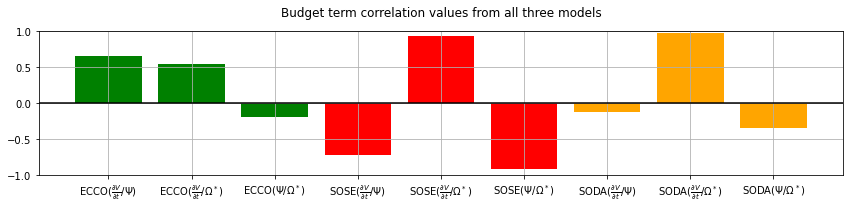

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.bar(x=r'ECCO($\frac{\partial V}{\partial t}/\Psi$)', height = ecco_dvdt_psi, color='green')
ax.bar(x=r'ECCO($\frac{\partial V}{\partial t}/\Omega^*$)', height = ecco_dvdt_omega, color='green')
ax.bar(x=r'ECCO($\Psi/\Omega^*$)', height= ecco_psi_omega, color='green')

ax.bar(x=r'SOSE($\frac{\partial V}{\partial t}/\Psi$)', height = sose_dvdt_psi, color='red')
ax.bar(x=r'SOSE($\frac{\partial V}{\partial t}/\Omega^*$)', height = sose_dvdt_omega, color='red')
ax.bar(x=r'SOSE($\Psi/\Omega^*$)', height= sose_psi_omega, color='red')

ax.bar(x=r'SODA($\frac{\partial V}{\partial t}/\Psi$)', height = soda_dvdt_psi, color='orange')
ax.bar(x=r'SODA($\frac{\partial V}{\partial t}/\Omega^*$)', height = soda_dvdt_omega, color='orange')
ax.bar(x=r'SODA($\Psi/\Omega^*$)', height= soda_psi_omega, color='orange')

ax.axhline(y=0, color='k')
ax.set_title(r'Budget term correlation values from all three models', fontsize=12, pad=15)
ax.set_ylabel('')
ax.grid()
ax.set_ylim(-1,1)
plt.tight_layout();

In [25]:
data[0]

[0.6553273341461735, 0.5514186928981204, -0.19067700339752622]

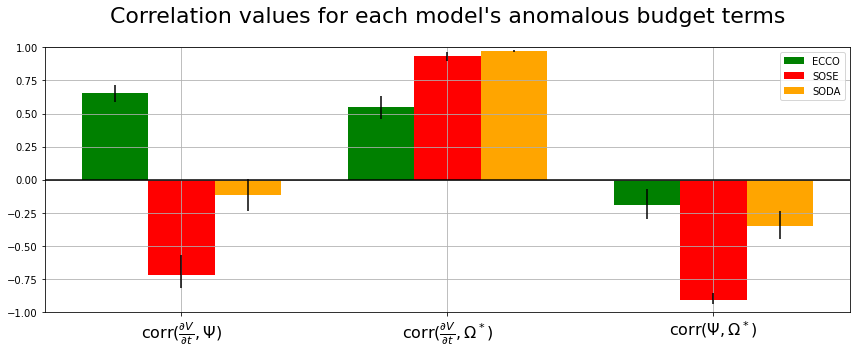

In [87]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

data = [[ecco_dvdt_psi, ecco_dvdt_omega, ecco_psi_omega],
        [sose_dvdt_psi, sose_dvdt_omega, sose_psi_omega],
        [soda_dvdt_psi, soda_dvdt_omega, soda_psi_omega]]
X = np.arange(3)

yerr_ecco = np.array([[0.07, 0.09, 0.11], [0.06, 0.08, 0.12]])
yerr_sose = np.array([[0.1, 0.04, 0.03], [0.15, 0.03, 0.06]])
yerr_soda = np.array([[0.12, 0.01, 0.1], [0.12, 0.01, 0.11]])

ax.bar(X + 0.00, data[0], color = 'g', width = 0.25, label='ECCO', yerr=yerr_ecco)
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25, label='SOSE', yerr=yerr_sose)
ax.bar(X + 0.50, data[2], color = 'orange', width = 0.25, label='SODA', yerr=yerr_soda)



ax.axhline(y=0, color='k')
ticks = [r"corr($\frac{\partial V}{\partial t},\Psi$)", 
         r"corr($\frac{\partial V}{\partial t},\Omega^*$)", 
         r"corr($\Psi,\Omega^*$)"]
ax.set_xticks(X + 0.25)
ax.set_xticklabels(ticks, fontsize=16)
ax.set_title("Correlation values for each model's anomalous budget terms", fontsize=22, pad=25)
ax.set_ylabel('')
ax.grid()
ax.set_ylim(-1,1)
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('corr-bars.pdf');

In [11]:
soda_dvdt_omega

0.9723936658240443

In [12]:
soda_dvdt_psi

-0.11819008489937648

In [13]:
soda_psi_omega

-0.346638197010356